## Diabetes

- Deep learning model using Python and TensorFlow/Keras to predict hospital readmission within 30 days based on the Diabetes 130-US hospitals for years 1999–2008 dataset. This dataset comprises over 100,000 records with 50 features related to patient and hospital outcomes.

- Dataset: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# Load the dataset
df = pd.read_csv('diabetic_data.csv')

# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [3]:
# Display the first few rows
print(df.head())

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [4]:
# Check for missing values
print(df.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

### Preprocess the Data
- Handle Missing Values: Replace or drop missing values as appropriate.
- Encode Categorical Variables: Convert categorical variables to numerical using label encoding or one-hot encoding.
- Normalize Numerical Features: Scale numerical features for better model performance.

In [5]:
# Drop columns with a high percentage of missing values or irrelevant information
df = df.drop(['weight', 'payer_code', 'medical_specialty', 'encounter_id', 'patient_nbr'], axis=1)

# Replace missing values in 'race' with the mode
df['race'] = df['race'].fillna(df['race'].mode()[0])

# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Separate features and target variable
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Convert target variable to binary: 1 if readmitted within 30 days, 0 otherwise
y = np.where(y == le.transform(['<30'])[0], 1, 0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Build the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
1273/1273 [==============================] - 4s 2ms/step - loss: 0.3831 - accuracy: 0.8815 - val_loss: 0.3429 - val_accuracy: 0.8877
Epoch 2/50
1273/1273 [==============================] - 3s 2ms/step - loss: 0.3509 - accuracy: 0.8886 - val_loss: 0.3385 - val_accuracy: 0.8877
Epoch 3/50
1273/1273 [==============================] - 3s 2ms/step - loss: 0.3446 - accuracy: 0.8884 - val_loss: 0.3379 - val_accuracy: 0.8878
Epoch 4/50
1273/1273 [==============================] - 3s 3ms/step - loss: 0.3410 - accuracy: 0.8885 - val_loss: 0.3373 - val_accuracy: 0.8878
Epoch 5/50
1273/1273 [==============================] - 3s 2ms/step - loss: 0.3392 - accuracy: 0.8886 - val_loss: 0.3372 - val_accuracy: 0.8878
Epoch 6/50
1273/1273 [==============================] - 3s 2ms/step - loss: 0.3381 - accuracy: 0.8886 - val_loss: 0.3373 - val_accuracy: 0.8878
Epoch 7/50
1273/1273 [==============================] - 3s 2ms/step - loss: 0.3374 - accuracy: 0.8888 - val_loss: 0.3377 - val_accuracy:

637/637 [==============================] - 1s 1ms/step - loss: 0.3368 - accuracy: 0.8879
Test Accuracy: 0.89


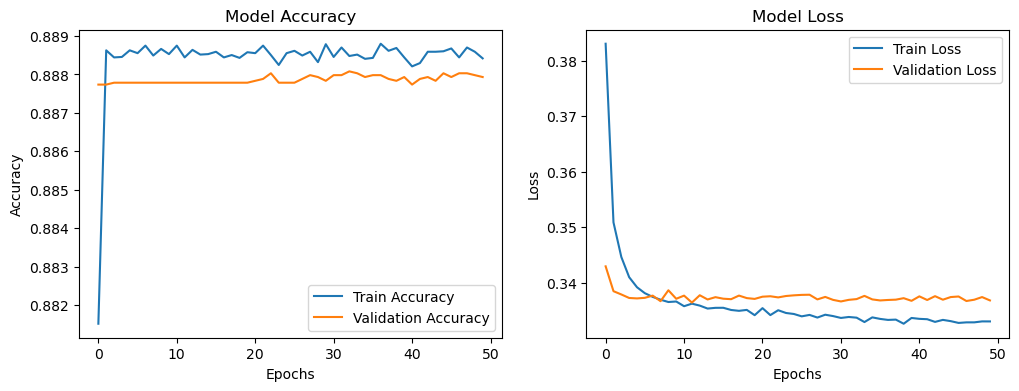

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()